In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

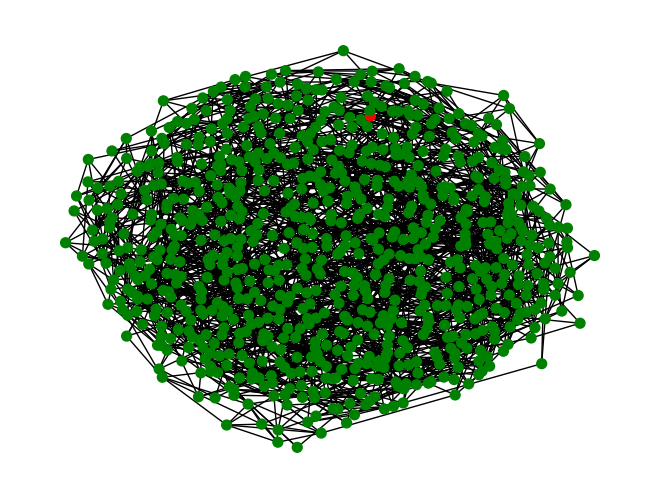

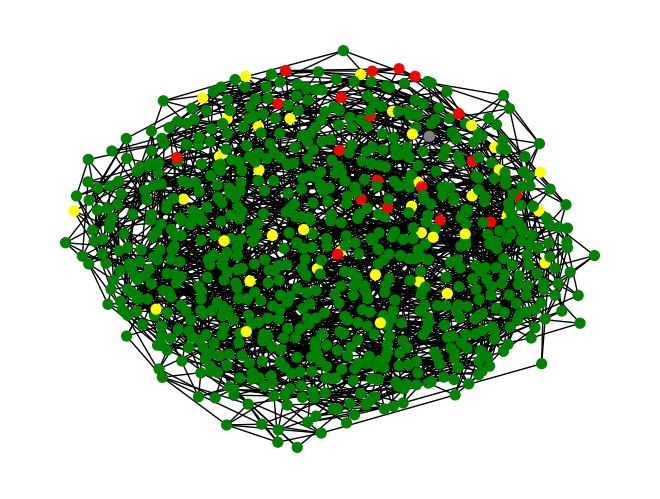

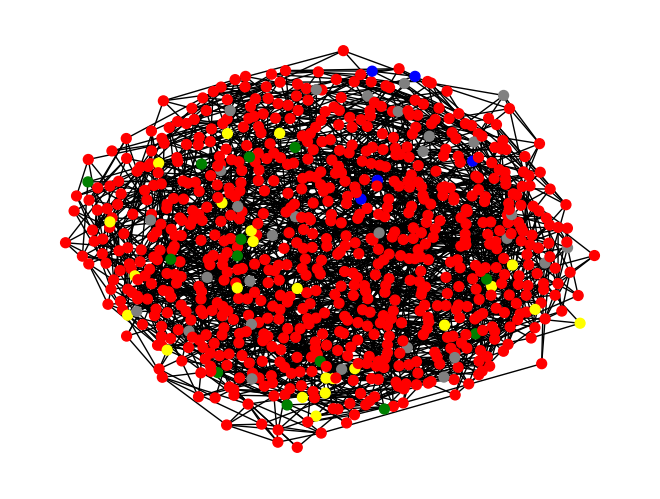

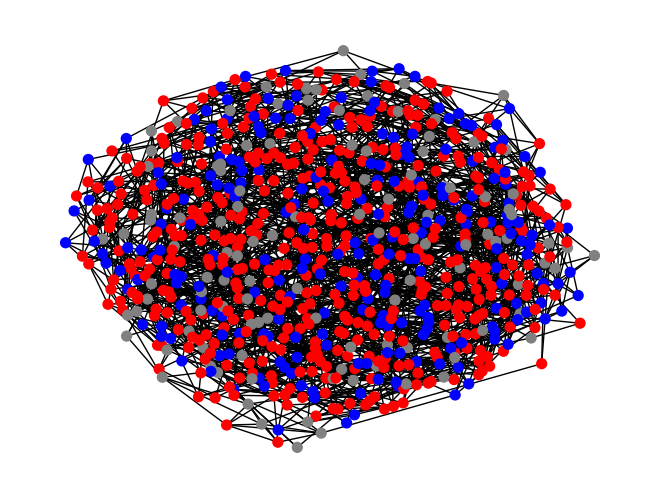

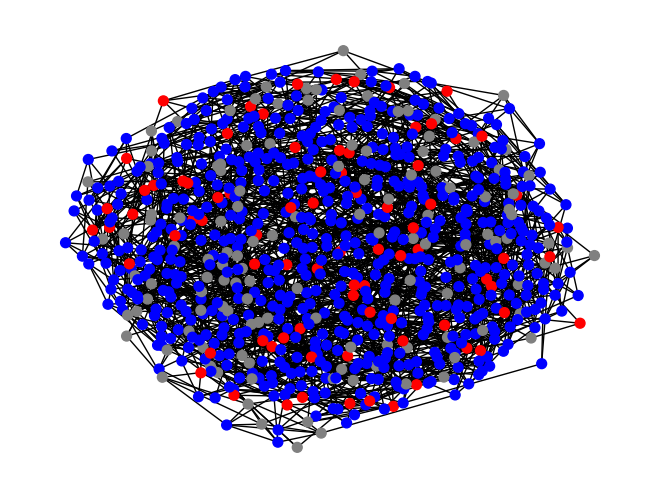

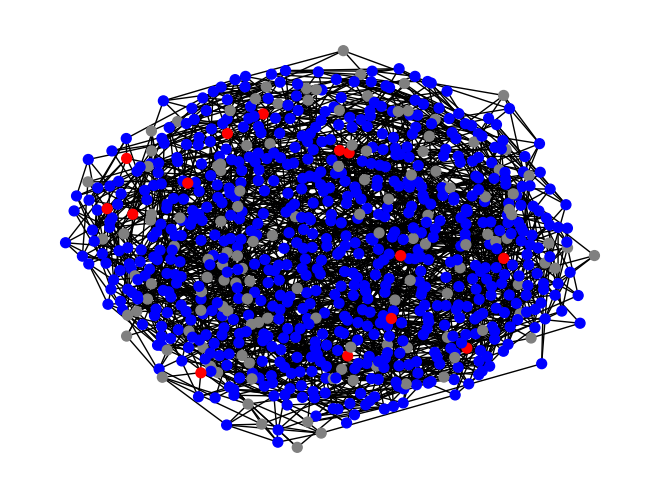

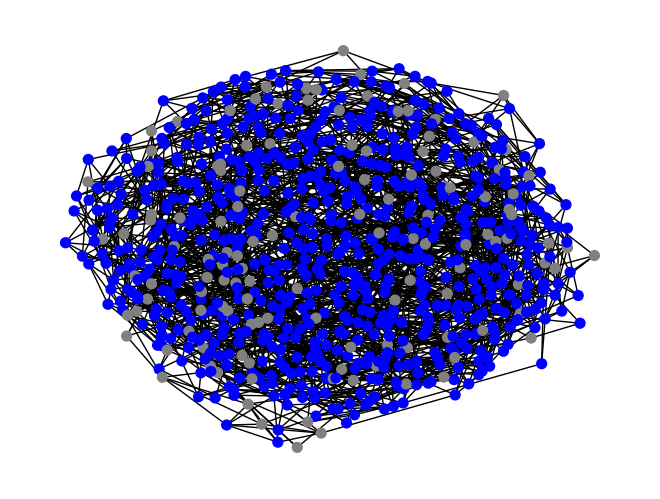

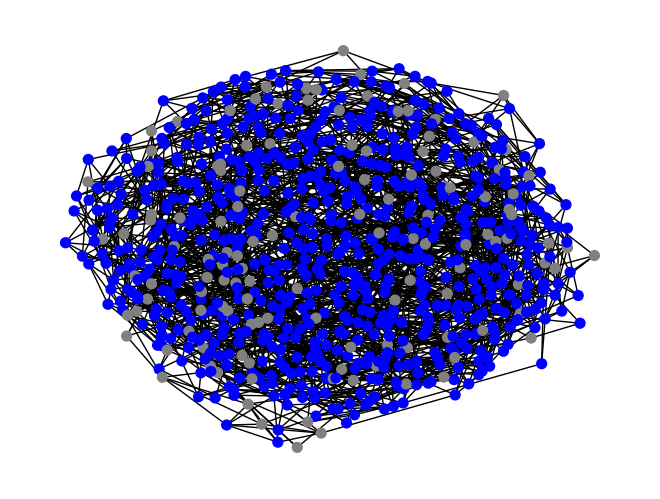

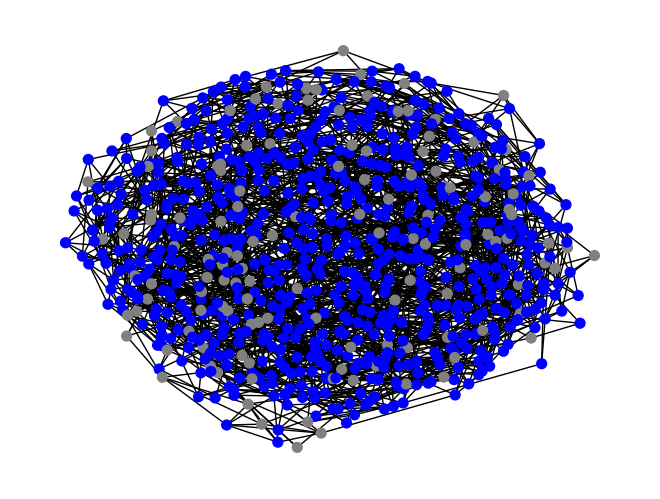

In [2]:
# Crear la red Watts-Strogatz
G = nx.watts_strogatz_graph(800, 7, 0.3)

# Inicializar atributos
nx.set_node_attributes(G, 'S', 'estado')
nx.set_node_attributes(G, 0, 'time')

'''
Los atributos constan de un estado para Susceptible, Infectado, Recuperado, Muerto
'''


# Configuración inicial: un nodo infectado
initial_infectado_node = np.random.randint(0,len(G))
G.nodes[initial_infectado_node]['estado'] = 'I'

# Parámetros del modelo SIR
beta = 0.2  # Tasa de transmisión
gamma = 0.15  # Tasa de recuperación
alpha = 0.01 # Tasa de mortalidad

timefinal = 150 #Tiempo final
recuperation_time = 10 #Tiempo de recuperacion


susceptibles = np.zeros(timefinal)
infectados = np.ones(timefinal)
recuperados = np.zeros(timefinal)
muertes = np.zeros(timefinal)
expuestos = np.zeros(timefinal)

susceptibles[0] = len(G)-1 #Cantidad de susceptibles inicialmente

# Parámetros del vuelo de Lévy
mu = 10
sigma = 2.5
levy_steps = np.random.standard_cauchy(timefinal) * sigma + mu

# Simulación del modelo SIR
for t in range(0, timefinal):  # Ciclo for hasta t=55

    #Conteo de variables
    actual_infectado = 0
    actual_recuperado = 0
    actual_muertes = 0
    actual_expuestos = 0

    #identificar los nodos infectados y aumento de tiempo global 
    nodos_infectados = []
    for node, data in G.nodes(data=True):
        data['time'] += 1
        
        #Tiempo en el que un expuesto se vuelve infeccioso
        if G.nodes[node]['estado'] == 'E' and data['time'] > levy_steps[t]:
            G.nodes[node]['estado'] = 'I'
            G.nodes[node]['time'] = 0
            actual_expuestos -= 1

        if data['estado'] == 'I':
            nodos_infectados.append(node)

    actual_infectado = len(nodos_infectados) #Cuenta los infectados del dia


    for node in nodos_infectados:

        # Aplicar reglas del modelo SIR
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            if G.nodes[neighbor]['estado'] == 'S':
                if np.random.rand() < beta:
                    #Nueva expocision 
                    G.nodes[neighbor]['estado'] = 'E'
                    G.nodes[node]['time'] = 0
                    actual_expuestos += 1 

        # Probabilidad de recuperación
        if (np.random.rand() < gamma and G.nodes[node]['time'] > recuperation_time):
            actual_recuperado += 1
            G.nodes[node]['estado'] = 'R'
            G.nodes[node]['time'] = 0
        
        #Probabilidad de muerte
        elif np.random.rand() < alpha :
            actual_muertes += 1
            G.nodes[node]['estado'] = 'M'
            G.nodes[node]['time'] = 0
    

    infectados[t] = actual_infectado - actual_recuperado - actual_muertes
    recuperados[t] = recuperados[t-1] + actual_recuperado
    muertes[t] = muertes[t-1] + actual_muertes
    expuestos[t] = expuestos[t-1] + actual_expuestos
    susceptibles[t] = len(G) - infectados[t] - recuperados[t] - muertes[t] -  expuestos[t]

    if t%10==0 and t<80:

        # Visualización del resultado final
        plt.figure()
        colors = {'S': 'green', 'I': 'red', 'R': 'blue', 'M' : 'gray', 'E': 'yellow'}
        node_colors = [colors[G.nodes[node]['estado']] for node in G.nodes()]
        nx.draw_kamada_kawai(G, with_labels=False, node_color=node_colors, node_size= 50)
    

plt.figure()
colors = {'S': 'green', 'I': 'red', 'R': 'blue', 'M' : 'gray', 'E': 'yellow'}
node_colors = [colors[G.nodes[node]['estado']] for node in G.nodes()]
nx.draw_kamada_kawai(G, with_labels=False, node_color=node_colors, node_size= 50)

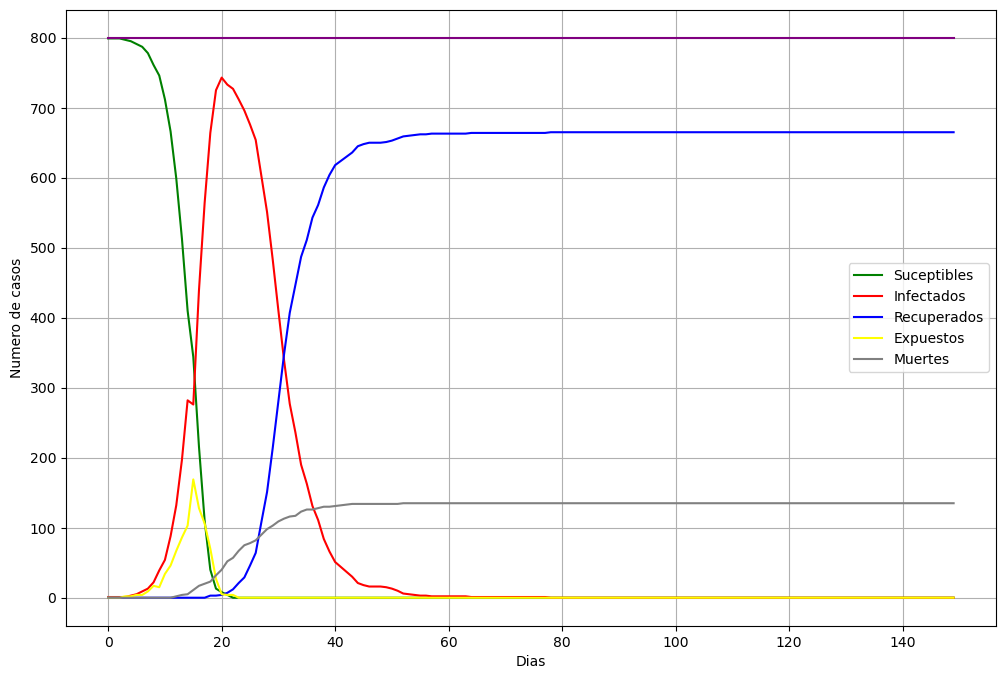

In [9]:
fig, ax = plt.subplots(figsize= (12,8))
ax.plot(np.arange(0,timefinal),susceptibles, label ='Suceptibles' , color = 'g')
ax.plot(np.arange(0,timefinal),infectados, label ='Infectados' , color = 'r')
ax.plot(np.arange(0,timefinal),recuperados, label ='Recuperados' , color = 'b')
ax.plot(np.arange(0,timefinal),expuestos, label ='Expuestos' , color = 'yellow')
ax.plot(np.arange(0,timefinal),muertes, label ='Muertes' , color = 'gray')
ax.plot(np.arange(0,timefinal),susceptibles+infectados+recuperados+ muertes + expuestos, color = 'purple')
#ax.set_ylim(0,20)
#ax.set_xlim(0,15)
ax.set_xlabel('Dias')
ax.set_ylabel('Numero de casos')
ax.grid(True)
ax.legend()

In [10]:

# Obtener los valores de 'time' de todos los nodos
valores_time = [data['time'] for node, data in G.nodes(data=True)]

# Imprimir los valores de 'time'
print("Valores de 'time' de todos los nodos:", valores_time)


Valores de 'time' de todos los nodos: [126, 120, 121, 119, 122, 124, 124, 118, 123, 118, 122, 125, 106, 119, 128, 123, 109, 126, 127, 98, 124, 104, 123, 108, 122, 106, 117, 121, 117, 107, 122, 119, 115, 118, 106, 111, 116, 118, 121, 124, 109, 117, 113, 121, 120, 118, 117, 113, 112, 122, 118, 121, 105, 118, 119, 121, 115, 126, 117, 116, 119, 111, 109, 117, 121, 117, 109, 120, 118, 128, 119, 119, 116, 122, 119, 118, 120, 115, 123, 121, 103, 121, 122, 121, 114, 105, 119, 120, 97, 113, 119, 121, 121, 121, 134, 119, 122, 125, 120, 121, 110, 120, 114, 113, 112, 105, 118, 116, 118, 117, 120, 119, 117, 120, 121, 111, 112, 108, 118, 118, 116, 109, 112, 117, 118, 111, 110, 117, 118, 121, 117, 119, 125, 111, 122, 133, 117, 116, 135, 114, 112, 119, 117, 116, 111, 118, 111, 109, 118, 115, 120, 119, 117, 115, 122, 117, 117, 118, 119, 114, 110, 122, 129, 125, 118, 129, 115, 118, 122, 106, 113, 121, 97, 115, 116, 119, 115, 109, 120, 118, 116, 116, 120, 117, 121, 119, 120, 110, 116, 120, 99, 118, 119, 

In [11]:
print(1==1 and 2==2)

True


In [12]:
G.nodes[1]['time'] = 0